# Democratization Trends in Post-Soviet Countries

This project analyzes democratization trends in post-soviet countries.

## Part 1: Parsing data

This section tests and loads the data from V-Dem. Skip this section if you're not interested in the technical details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd

In [2]:
from os import path
#import warnings
#warnings.filterwarnings("ignore")

vdem_file = './Country_Year_V-Dem_CSV_v8/V-Dem-CY-v8.csv'

In [3]:
print('File size in MB:')
print(path.getsize(vdem_file) / (1<<20))

File size in MB:
484.73115062713623


In [4]:
print('Number of rows in file:')
with open(vdem_file) as file:
    print(sum(1 for line in file))

Number of rows in file:
26538


In [5]:
vdem_data = pd.read_csv(vdem_file)

/home/maxim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1042,1043,1315,2373,2422) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
vdem_data.head()

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,v2xel_elecpres,v2xex_elecreg,v2xlg_elecreg,v2xlg_leginter,v2xme_altinf,v2xme_altinf_codehigh,v2xme_altinf_codelow,v2xps_party,v2xps_party_codehigh,v2xps_party_codelow
0,Afghanistan,AFG,36,1789,1789-12-31,1,1,Emirate of Afghanistan (1789-1839),1789,2017,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,36,1790,1790-12-31,1,1,Emirate of Afghanistan (1789-1839),1789,2017,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,36,1791,1791-12-31,1,1,Emirate of Afghanistan (1789-1839),1789,2017,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,36,1792,1792-12-31,1,1,Emirate of Afghanistan (1789-1839),1789,2017,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,36,1793,1793-12-31,1,1,Emirate of Afghanistan (1789-1839),1789,2017,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
vdem_indexed = vdem_data.set_index(['country_name', 'year'])
vdem_indexed.head()

country_text_id  country_id historical_date  project  \
country_name year                                                        
Afghanistan  1789             AFG          36      1789-12-31        1   
             1790             AFG          36      1790-12-31        1   
             1791             AFG          36      1791-12-31        1   
             1792             AFG          36      1792-12-31        1   
             1793             AFG          36      1793-12-31        1   

                   historical                            histname  \
country_name year                                                   
Afghanistan  1789           1  Emirate of Afghanistan (1789-1839)   
             1790           1  Emirate of Afghanistan (1789-1839)   
             1791           1  Emirate of Afghanistan (1789-1839)   
             1792           1  Emirate of Afghanistan (1789-1839)   
             1793           1  Emirate of Afghanistan (1789-1839)   

                   codingstart  codingend  codingstart_contemp  \
country_name year                                                
Afghanistan  1789         1789       2017               1900.0   
             1790         1789       2017               1900.0   
             1791         1789       2017               1900.0   
             1792         1789       2017               1900.0   
             1793         1789       2017               1900.0   

                   codingend_contemp         ...           v2xel_elecpres  \
country_name year                            ...                            
Afghanistan  1789             2017.0         ...                        0   
             1790             2017.0         ...                        0   
             1791             2017.0         ...                        0   
             1792             2017.0         ...                        0   
             1793             2017.0         ...                        0   

                   v2xex_elecreg  v2xlg_elecreg  v2xlg_leginter  v2xme_altinf  \
country_name year                                                               
Afghanistan  1789              0              0             0.0           NaN   
             1790              0              0             0.0           NaN   
             1791              0              0             0.0           NaN   
             1792              0              0             0.0           NaN   
             1793              0              0             0.0           NaN   

                   v2xme_altinf_codehigh  v2xme_altinf_codelow  v2xps_party  \
country_name year                                                             
Afghanistan  1789                    NaN                   NaN          NaN   
             1790                    NaN                   NaN          NaN   
             1791                    NaN                   NaN          NaN   
             1792                    NaN                   NaN          NaN   
             1793                    NaN                   NaN          NaN   

                   v2xps_party_codehigh  v2xps_party_codelow  
country_name year                                             
Afghanistan  1789                   NaN                  NaN  
             1790                   NaN                  NaN  
             1791                   NaN                  NaN  
             1792                   NaN                  NaN  
             1793                   NaN                  NaN  

[5 rows x 2690 columns]

## Part 2: Extracting and plotting data

Let's begin now with extracting data for countries we are interested in and make some initial plots.

In [8]:
# Function to get data of a particular country by year.
def get_year_of_country(country, year):
    data = vdem_indexed.loc[country].loc[year]
    return data[data.notnull()]

In [9]:
get_year_of_country('Germany', 2017).head(20)

country_text_id                                             DEU
country_id                                                   77
historical_date                                      2017-12-31
project                                                       0
historical                                                    1
histname                  Federal Republic of Germany (1949- ).
codingstart                                                1789
codingend                                                  2017
codingstart_contemp                                        1900
codingend_contemp                                          2017
codingstart_hist                                           1789
codingend_hist                                             1920
gapstart1                                                  1945
gapend1                                                    1948
COWcode                                                     255
v2x_polyarchy                           

In [10]:
# Function to get particular index of country as it evolves over the years.
def get_index_of_country(country, index):
    data = vdem_indexed.loc[country][index]
    return data[data.notnull()]

In [11]:
get_index_of_country('Afghanistan', 'v2x_polyarchy').head()

year
1905    0.044755
1906    0.042686
1907    0.042686
1908    0.045832
1909    0.045832
Name: v2x_polyarchy, dtype: float64

In [12]:
# Function to plot index evolution.
def plot_index_of_country(country, index):
    data = get_index_of_country(country, index)
    
    plt.plot(data.index, data.values)

Let's plot the electoral democratization trends of five post-soviet countries.

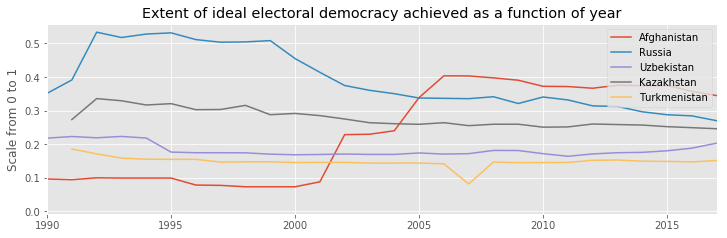

In [13]:
plt.figure(figsize = (12, 3.5))

countries = ['Afghanistan', 'Russia', 'Uzbekistan', 'Kazakhstan', 'Turkmenistan']

for country in countries:
    plot_index_of_country(country, 'v2x_polyarchy')

plt.legend(countries)
plt.title('Extent of ideal electoral democracy achieved as a function of year')
plt.ylabel('Scale from 0 to 1')
plt.xlim([1990, 2017])
plt.show()

In [14]:
democracies = {'electoral': 'v2x_polyarchy', 'liberal': 'v2x_libdem', 'participatory': 'v2x_partipdem', 'deliberative': 'v2x_delibdem'}

Now let's see how different types of democracies have evolved in a particular country.

In [15]:
# Function to get all types of democracies in a particular country.
def get_democracies_of_country(country):
    data = vdem_indexed[list(democracies.values())].loc[country]
    return data[data.notnull()]

In [16]:
get_democracies_of_country('Afghanistan').head()

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem
year,,,,
1789,NaN,NaN,NaN,NaN
1790,NaN,NaN,NaN,NaN
1791,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN
1793,NaN,NaN,NaN,NaN


In [17]:
# Function to plot evolution of all democracy types.
def plot_democracies_of_country(country):
    data = get_democracies_of_country(country)
    
    for democracy in democracies.values():
        plt.plot(data.index, data[democracy])

Now let's see how different democratization trends have evolved in Afghanistan...

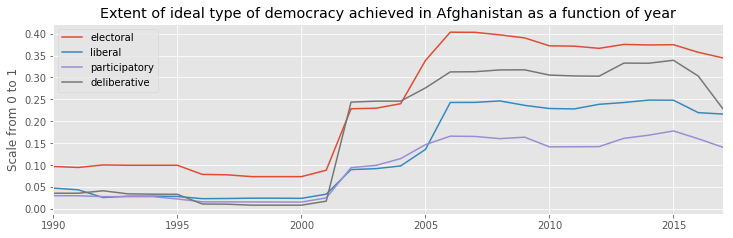

In [18]:
plt.figure(figsize = (12, 3.5))

plot_democracies_of_country('Afghanistan')

plt.legend(democracies)
plt.title('Extent of ideal type of democracy achieved in Afghanistan as a function of year')
plt.ylabel('Scale from 0 to 1')
plt.xlim([1990, 2017])
plt.show()

...and in Turkmenistan.

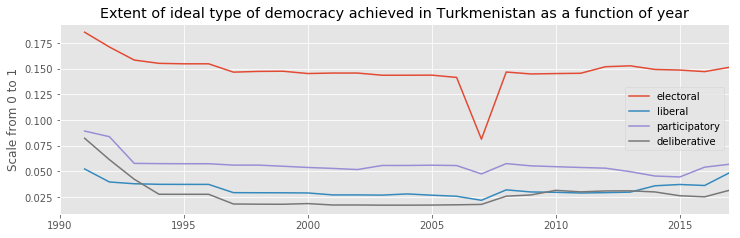

In [19]:
plt.figure(figsize = (12, 3.5))

plot_democracies_of_country('Turkmenistan')

plt.legend(democracies)
plt.title('Extent of ideal type of democracy achieved in Turkmenistan as a function of year')
plt.ylabel('Scale from 0 to 1')
plt.xlim([1990, 2017])
plt.show()

Note the dip in 2007. What happened?